In [1]:
from main import *
from googleapiclient.discovery import build
import json
import pprint
from IPython.display import JSON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import config
from numerize import numerize

In [2]:
channel_id = 'UC1dI4tO13ApuSX0QeX8pHng'
channel_ids = [
    'UCOmHUn--16B90oW2L6FRR3A', # Blackpink
    'UC1dI4tO13ApuSX0QeX8pHng', # gadgetin
    'UCVvhlqBpNVoG-DUT3J0oZ-w', # tara arts
    'UCwljrkoI5jsfvAKgW3zNC7Q', # shopee
    'UCAFlBkLMn1dmdYk0kBud4RA', # tokopedia
]

youtube = build('youtube', 'v3', developerKey=config.api_key)

In [3]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

,channel_name,subscribers,total_views,video_count,playlistId
0,SHOPEE Indonesia,2440000,6422460927,3688,UUwljrkoI5jsfvAKgW3zNC7Q
1,GadgetIn,9610000,2085951930,1255,UU1dI4tO13ApuSX0QeX8pHng
2,Tokopedia,2320000,1724203428,1038,UUAFlBkLMn1dmdYk0kBud4RA
3,Tara Arts Game Indonesia,1270000,421954293,1941,UUVvhlqBpNVoG-DUT3J0oZ-w
4,BLACKPINK,76600000,24887833021,407,UUOmHUn--16B90oW2L6FRR3A


In [4]:
# get response as a dataframe
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics.sort_values('channel_name', ignore_index=True, inplace=True)
channel_statistics

,channel_name,subscribers,total_views,video_count,playlistId
0,BLACKPINK,76600000,24887833021,407,UUOmHUn--16B90oW2L6FRR3A
1,GadgetIn,9610000,2085951930,1255,UU1dI4tO13ApuSX0QeX8pHng
2,SHOPEE Indonesia,2440000,6422460927,3688,UUwljrkoI5jsfvAKgW3zNC7Q
3,Tara Arts Game Indonesia,1270000,421954293,1941,UUVvhlqBpNVoG-DUT3J0oZ-w
4,Tokopedia,2320000,1724203428,1038,UUAFlBkLMn1dmdYk0kBud4RA


In [5]:
# change datatypes
channel_statistics['subscribers'] = pd.to_numeric(channel_statistics['subscribers'])
channel_statistics['total_views'] = pd.to_numeric(channel_statistics['total_views'])
channel_statistics['video_count'] = pd.to_numeric(channel_statistics['video_count'])
channel_statistics.dtypes

channel_name    object
subscribers      int64
total_views      int64
video_count      int64
playlistId      object
dtype: object

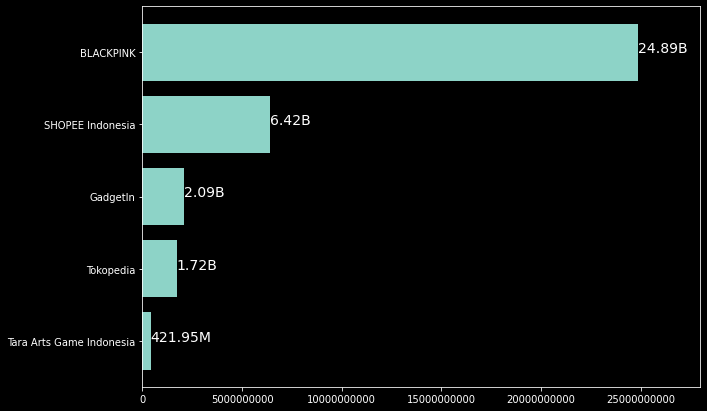

In [6]:
plot_channel_views = channel_statistics.sort_values('total_views')
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(plot_channel_views['channel_name'], plot_channel_views['total_views'])

# get rid of scientific expression for x axis
plt.ticklabel_format(axis="x", style="plain")

# display values next to bar plot
for index, value in enumerate(plot_channel_views['total_views']):
    plt.text(value, index,
             str(numerize.numerize(value)), fontsize=14) # set the values to compact number

# set x axis limit
plt.xlim([0, 28000000000])

plt.show();


In [7]:
# get_playlist for video_ids
get_playlist_ids = get_playlist(youtube, channel_statistics)[0] # blackpink

video_ids1 = get_video_ids(youtube, get_playlist_ids)
len(video_ids1)

407

In [8]:
# get only 5 video ids
five_video_id = video_ids1[0:5]
get_video_details(youtube, five_video_id)

,video_id,title,description,tags,published_at,thumbnails,view_count,like_count,comment_count,duration,definition,caption
0,h86_wjTQ3-U,#PinkVenomChallenge Coming Soon Only on YouTub...,See you soon #BLINKs 🖤💖 #PinkVenomChallenge\n\...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-16T10:00:02Z,https://i.ytimg.com/vi/h86_wjTQ3-U/hqdefault.jpg,592135,192048,6984,PT16S,hd,false
1,6eCCRvCWez8,BLACKPINK - ‘Pink Venom’ Concept Teaser,#BLACKPINK #블랙핑크 #PreReleaseSingle #PinkVenom ...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-14T15:00:03Z,https://i.ytimg.com/vi/6eCCRvCWez8/hqdefault.jpg,8926978,1446197,85112,PT18S,hd,false
2,FQkI9RtkmrI,BLACKPINK - ‘Pink Venom’ JISOO Concept Teaser #2,#BLACKPINK #블랙핑크 #JISOO #지수 #PreReleaseSingle ...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-13T03:00:17Z,https://i.ytimg.com/vi/FQkI9RtkmrI/hqdefault.jpg,7688124,1177101,73109,PT16S,hd,false
3,9q3byegECqw,BLACKPINK - ‘Pink Venom’ JENNIE Concept Teaser #2,#BLACKPINK #블랙핑크 #JENNIE #제니 #PreReleaseSingle...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-13T03:00:04Z,https://i.ytimg.com/vi/9q3byegECqw/hqdefault.jpg,5887147,985789,58874,PT16S,hd,false
4,7C0TewNgkDM,BLACKPINK - ‘Pink Venom’ ROSÉ Concept Teaser #2,#BLACKPINK #블랙핑크 #ROSÉ #로제 #PreReleaseSingle #...,"[YG Entertainment, YG, 와이지, K-pop, BLACKPINK, ...",2022-08-12T15:00:31Z,https://i.ytimg.com/vi/7C0TewNgkDM/hqdefault.jpg,7607002,1208666,65172,PT16S,hd,false


In [9]:
five_video_comments_df = get_comments_in_videos(youtube, five_video_id)
five_video_comments_df

,video_id,comments
0,h86_wjTQ3-U,"[Blackbnki fanlari ben fanym\n👇\n👇, C..."
1,6eCCRvCWez8,"[غ٧زهزه, Cuando sale el teaser?, Looooool, ياا..."
2,FQkI9RtkmrI,"[So petty, Why viewers not moving, Gorgeous 😍,..."
3,9q3byegECqw,"[Rosé 7.6m\nJennie 5.8m\n👏👏👍👍🤣😂🤣👍👏🤣😂😍, Jennie,..."
4,7C0TewNgkDM,"[Gorg!, Pretty!, Ganda mo, HUHU, Wow, 🤍, Hdudj..."


In [10]:
five_video_comments_df['comments'].iloc[2]

['So petty',
 'Why viewers not moving',
 'Gorgeous 😍',
 'Keep supporting',
 'Kim jisoooooooooo',
 'KİM JİSOO <33',
 'Jisoo',
 'Wow',
 'Guys please support jisoo',
 'Jisoooo',
 'Çok güzell',
 'джису с чёлкой,омг🤯',
 'love jisoo and blackpink',
 'Jisooooooo',
 'WOW',
 'OMG',
 'jisoo我爱你',
 'Jisoo so gorgeous',
 'Am i the only one who thought jisoo was lisa?',
 '我秀太美了']